<img src="https://raw.githubusercontent.com/AkulAshray/Pandas-tutorial/main/Corndel_Logos_RGB.png" style="float: left; margin: 20px; height: 55px"><h1 style=" font-size:1.5em; font-family:Verdana"> Pandas Fundamentals II </h1>

<hr style="border: 0.5px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
In this section, we will explore how to aggregate and join data in Pandas. We will introduce GroupBy objects and use them to consolidate and summarise a DataFrame. The goal is to aggregate data based on groups and perform operations to derive meaningful insights. We will also cover some advanced aggregation functions and demonstrate their usefulness in understanding complex datasets.
</p>



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

expenses = pd.read_csv('2019-20.csv')
expenses.head()

,Itinerary ID,Travel Date,Traveller Name,Travel Type,Trip Length (Days),Total £,Net £,Tax £,Detail,Reason for Travel
0,103533993,09/03/2020,Abigail Marshall Katung,Train,NaN,33.9,33.90,0.00,Leeds - Coventry (Advance Single),Conference - as an attendee
1,103533626,11/03/2020,Abigail Marshall Katung,Train,NaN,66.2,66.20,0.00,Coventry - Leeds (Off-Peak Single),Conference - as an attendee
2,102425812,24/10/2019,Andrew Scopes,Hotel,1.0,83.0,69.17,13.83,"ibis Cambridge Central Station, 24/10/2019, 1 ...",Meeting with other public sector organisations
3,102425835,24/10/2019,Andrew Scopes,Train,NaN,26.0,26.00,0.00,Leeds - Cambridge (Advance Single),Meeting with other public sector organisations
4,102425836,25/10/2019,Andrew Scopes,Train,NaN,50.8,50.80,0.00,Cambridge - Leeds (Super Off-Peak Single (Onli...,Meeting with other public sector organisations


<h1 style=" font-size:1.4em; font-family:Verdana"> Aggregating Data with .groupby </h1>

<hr style="border: 0.5px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
Up until now, we’ve worked primarily with individual rows of DataFrames. However, data scientists often need to compute summary statistics (e.g., mean, median, sum) for groups of rows in a DataFrame. To achieve this, we can use Pandas GroupBy objects.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
GroupBy objects allow us to group together rows based on a particular column's values, such as grouping by a "Travel Type" in an expenses DataFrame. This grouping enables us to apply aggregation functions like sum, mean, max, etc., to the grouped data.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
Let’s say we wanted to aggregate all rows in expenses table for different Travel Types.
</p>


In [2]:
expenses.groupby('Travel Type')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
This generates a GroupBy object, which groups rows by unique values in the "Travel Type" column. Imagine it as creating sub-DataFrames for each "Travel Type."
</p>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
The diagram below shows a simplified view of expenses to help illustrate this idea.
</p>

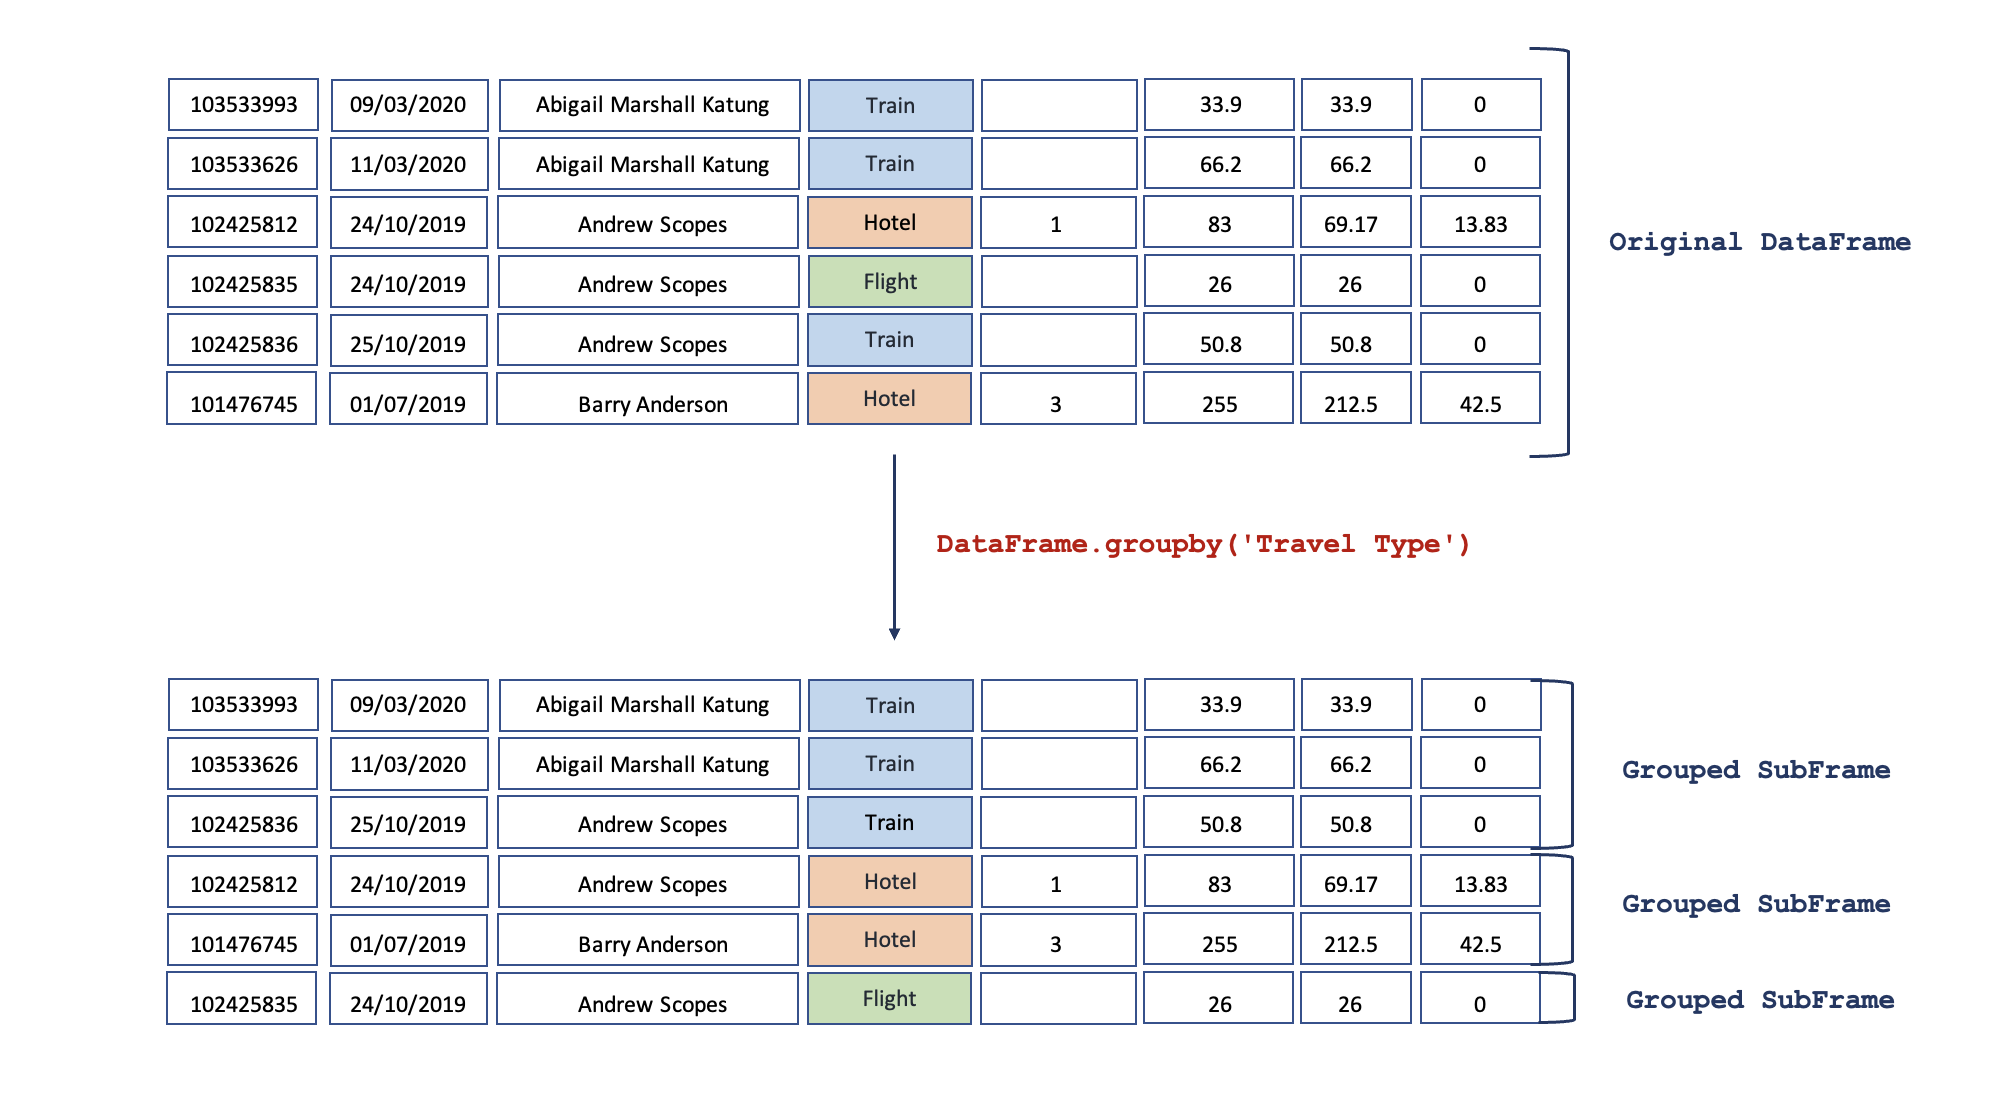

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
We can’t work with a GroupBy object directly – that is why we saw that strange output earlier rather than a standard view of a DataFrame. To actually manipulate values within these “sub” DataFrames, we’ll need to call an <strong>aggregation</strong> method. This is a method that tells pandas how to aggregate the values within the GroupBy object. Once the aggregation is applied, pandas will return a normal (now grouped) DataFrame.
</p>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
The first aggregation method we’ll consider is <code>.agg</code> or <code>.aggregate</code>. The <code>.agg</code> method takes in a function as its argument; this function is then applied to each column of a “mini” grouped DataFrame. We end up with a new DataFrame with one aggregated row per subframe. Let’s see this in action by finding the sum of Total £ for every Travel Type in our expenses DataFrame – this is equivalent to finding a breakdown of expenses in each Travel Type category.
</p>


In [3]:
expenses[["Travel Type", "Total £"]].groupby("Travel Type").agg(sum)

,Total £
Travel Type,
Flight,555.69
Hotel,1968.79
Train,6453.10
Travelcard,78.60


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
We can relate this back to the diagram we used above. Remember that the illustration uses a simplified version of expenses, which is why we see smaller values for the summed Total.
</p>

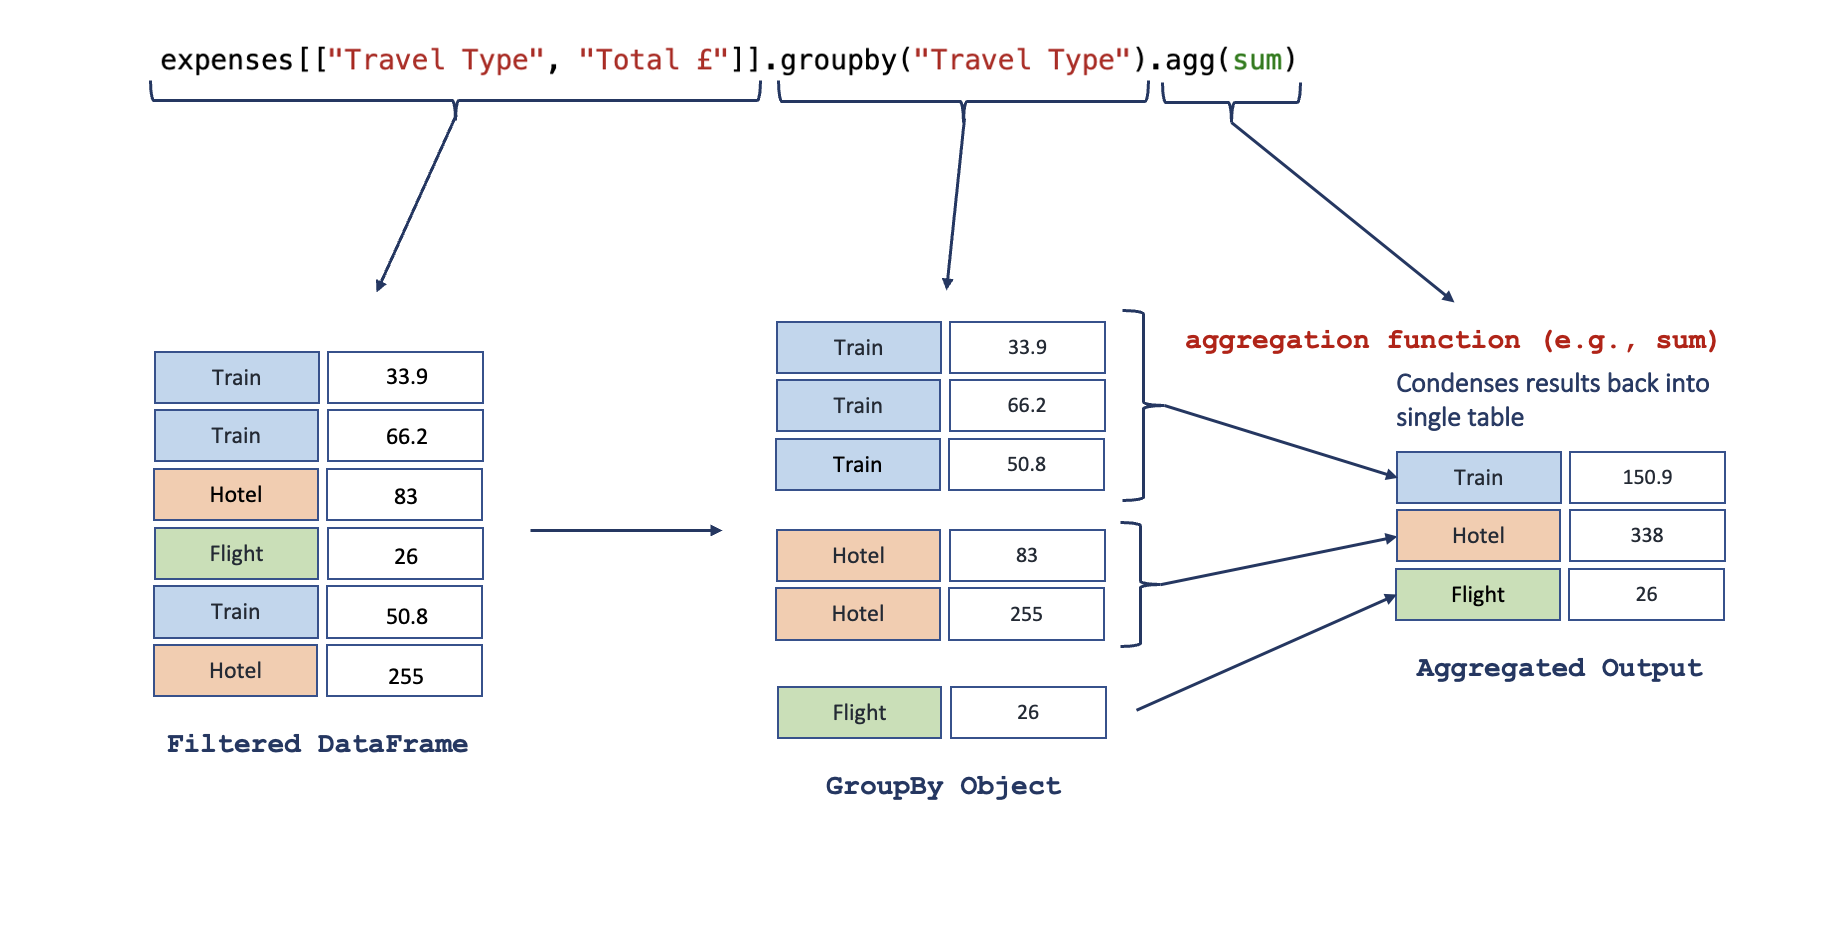

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
Calling <code>.agg</code> has condensed each subframe back into a single row. This gives us our final output: a DataFrame that is now indexed by "Travel Type", with a single row for each unique Travel Type in the original expenses DataFrame.
</p>

<h2 style=" font-size:1.2em; font-family:Verdana"> What goes inside of <code>.agg()</code>? </h2>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
There are multiple aggregation functions that Pandas supports, depending on the analysis you want to perform. Some commonly used functions include:
</p>

<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
  <li><strong>sum</strong>: Adds all values in a group</li>
  <li><strong>mean</strong>: Computes the average of values in a group</li>
  <li><strong>max</strong>: Returns the maximum value in a group</li>
  <li><strong>min</strong>: Returns the minimum value in a group</li>
  <li><strong>first</strong>: Returns the first value in a group</li>
  <li><strong>last</strong>: Returns the last value in a group</li>
</ul>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
For example, to calculate the maximum expenses for each "Travel Type":
</p>


In [4]:
# Max total expenses for each travel type
expenses[["Travel Type", "Total £"]].groupby("Travel Type").agg(max)

,Total £
Travel Type,
Flight,360.57
Hotel,255.00
Train,279.00
Travelcard,13.10


In [5]:
# Min total expense for each travel type
expenses[["Travel Type", "Total £"]].groupby("Travel Type").agg(min)

,Total £
Travel Type,
Flight,195.12
Hotel,51.00
Train,6.50
Travelcard,13.10


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
The last two options in the list – "first" and "last" – are unique to pandas. They return the first or last entry in a subframe column.
</p>


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
Why might this be useful? Consider a case where multiple columns in a group share identical information. To represent this information in the grouped output, we can simply grab the first or last entry, which we know will be identical to all other entries.
</p>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
Let’s look at an example to see how it works. Say we want to obtain the first reason for travel for each travellers
</p>

In [6]:
expenses[["Traveller Name", "Reason for Travel"]].groupby("Traveller Name").agg("first")

,Reason for Travel
Traveller Name,
Abigail Marshall Katung,Conference - as an attendee
Andrew Scopes,Meeting with other public sector organisations
Barry Anderson,Conference - as an attendee
Debra Coupar,Member portfolio/Council business (Elected Mem...
Denise Ragan,Conference - as an attendee
Eileen Taylor,LCC hosted event - LCC funded
Fiona Venner,Member portfolio/Council business (Elected Mem...
Graham Latty,Meeting with other external bodies
James Lewis,Member portfolio/Council business (Elected Mem...


<h1 style=" font-size:1.4em; font-family:Verdana"> Plotting after Aggregating </h1>

<hr style="border: 0.5px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
Aggregating and visualising data often go hand in hand. Visualisation software frequently aggregates data before presenting it visually, making complex data more comprehensible at a glance. In Pandas, we have the flexibility to perform these steps separately: first, we can aggregate the data using methods like <code>.agg</code>, and then we can create visualisations based on the aggregated results.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
Aggregating data is particularly useful when dealing with categorical data alongside numerical data. For instance, we might want to aggregate numerical values based on categories and then visualise the results using bar plots or box plots. This approach helps in summarising large datasets and highlighting trends or patterns within different groups.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
For example, in our expenses data, we can plot the total expenses for each travel type by first aggregating the data and then visualising it.
</p>

In [7]:
travel_type_sum = expenses[["Travel Type", "Total £"]].groupby("Travel Type").agg(sum)
travel_type_sum

,Total £
Travel Type,
Flight,555.69
Hotel,1968.79
Train,6453.10
Travelcard,78.60


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
In the code above, we saved our aggregated table as a new variable called <code>travel_type_sum</code>. We can then use this saved variable to help with plotting the data visually.
</p>

<AxesSubplot: xlabel='Travel Type'>

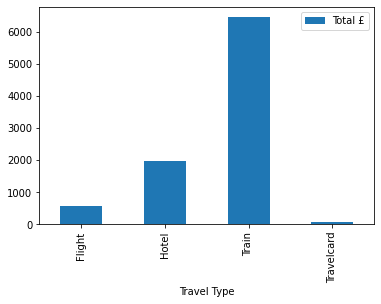

In [8]:
travel_type_sum.plot(kind='bar')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
By default, the <code>sort_values</code> method will sort the values in ascending order. If we want it sorted in descending order, we can add an additional parameter, <code>ascending=False</code>.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Let's have a look at what happens if we change our aggregation function from <code>'sum'</code> to <code>'mean'</code>. In that case, we see that on average the highest expense is associated with flights, followed by hotels and then train.
</p>


<AxesSubplot: xlabel='Travel Type'>

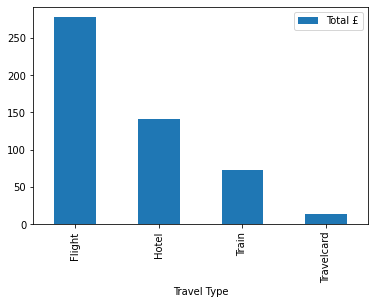

In [9]:
# plotting the mean of all expenses recorded for each travel type
travel_type_mean = expenses[["Travel Type", "Total £"]].groupby("Travel Type").agg('mean')
travel_type_mean.plot(kind='bar')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    If we use the Seaborn package, we can plot our chart without needing to aggregate it separately. Let's say we wanted to plot the sum of all expenses recorded for each traveller; we could do this using the <code>.barplot()</code> in seaborn package. Before using the function, we need to make sure that we have imported the package (atleast once in our notebook).
</p>

<AxesSubplot: xlabel='Traveller Name', ylabel='Total £'>

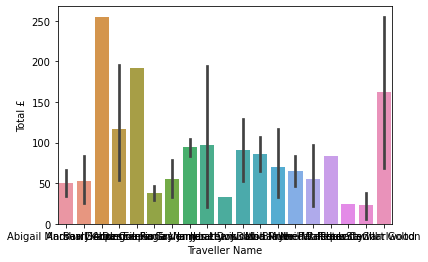

In [10]:
import seaborn as sns

sns.barplot(data=expenses,
           x='Traveller Name',
           y='Total £')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> The <code>barplot()</code> function provides several additional parameters to further customize or improve our plots. We can modify things like the aggregation function, color, error bars, and more. </p>

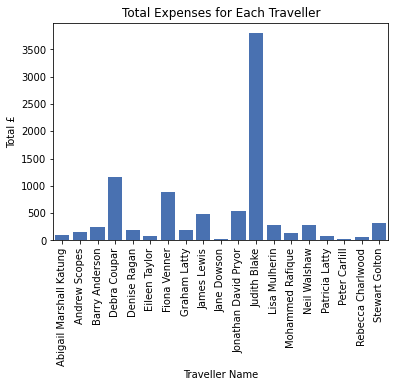

In [11]:
sns.barplot(data=expenses, 
            x='Traveller Name', 
            y='Total £',
            estimator='sum',  # Aggregates the data by summing the values
            errorbar=None,    # Removes the error bars from the plot
            color="#386dc2")  # Sets the color of the bars
plt.title('Total Expenses for Each Traveller')  # Sets the title of the plot
plt.xticks(rotation=90);  # Rotates the x-axis labels for better readability

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> In this example, we set the <code>estimator</code> parameter to <code>'sum'</code>, which instructs Seaborn to sum all expenses for each traveller. Additionally, we removed the error bars using <code>errorbar=None</code> and specified the color of the bars using the <code>color</code> parameter. Lastly, we set the title of the chart and rotated the x-axis labels to ensure that the traveller names are fully readable. </p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> In the next example, we are plotting the average expense for each travel reason using the Seaborn <code>barplot()</code> function. This is done by setting the <code>estimator</code> parameter to <code>'mean'</code>, which calculates the mean of the expenses for each "Reason for Travel" category. The result is a bar plot that displays the average amount spent for each reason for travel. </p>

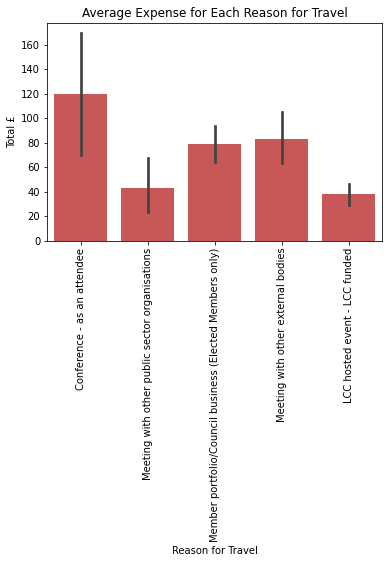

In [12]:
sns.barplot(data=expenses, 
            x='Reason for Travel', 
            y='Total £',
            estimator='mean',
            color='#db4444')  # Sets the color of the bars
plt.title('Average Expense for Each Reason for Travel')  # Sets the title of the plot
plt.xticks(rotation=90);  # Rotates the x-axis labels for readability

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> In this case, we are using <code>'Reason for Travel'</code> as the x-axis variable and <code>'Total £'</code> as the y-axis variable. The color of the bars is set to <code>#db4444</code>, a shade of red, to visually distinguish it from other charts. The <code>plt.title()</code> function sets the title to "Average Expense for Each Reason for Travel," providing context for what the chart represents. </p> <p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> Finally, we use <code>plt.xticks(rotation=90)</code> to rotate the x-axis labels vertically. This ensures that the "Reason for Travel" labels, which might be longer, are readable and not overlapping each other. </p>

<h1 style=" font-size:1.4em; font-family:Verdana"> Plotting after Aggregating: Boxplot </h1>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> Box plots (also known as box-and-whisker plots) provide a visual summary of key statistics of a distribution. The box itself denotes the interquartile range (IQR), spanning from the 25th percentile to the 75th percentile, while the line inside the box represents the median (50th percentile). The whiskers extend from the box to show the tails of the distribution, covering the range of the data, excluding outliers. Outliers, which are unusually large or small values, are plotted as individual points beyond the whiskers. While box plots do not reveal as much about the distribution’s exact shape as histograms, they are useful for quickly assessing symmetry, skewness, and the presence of outliers. </p>

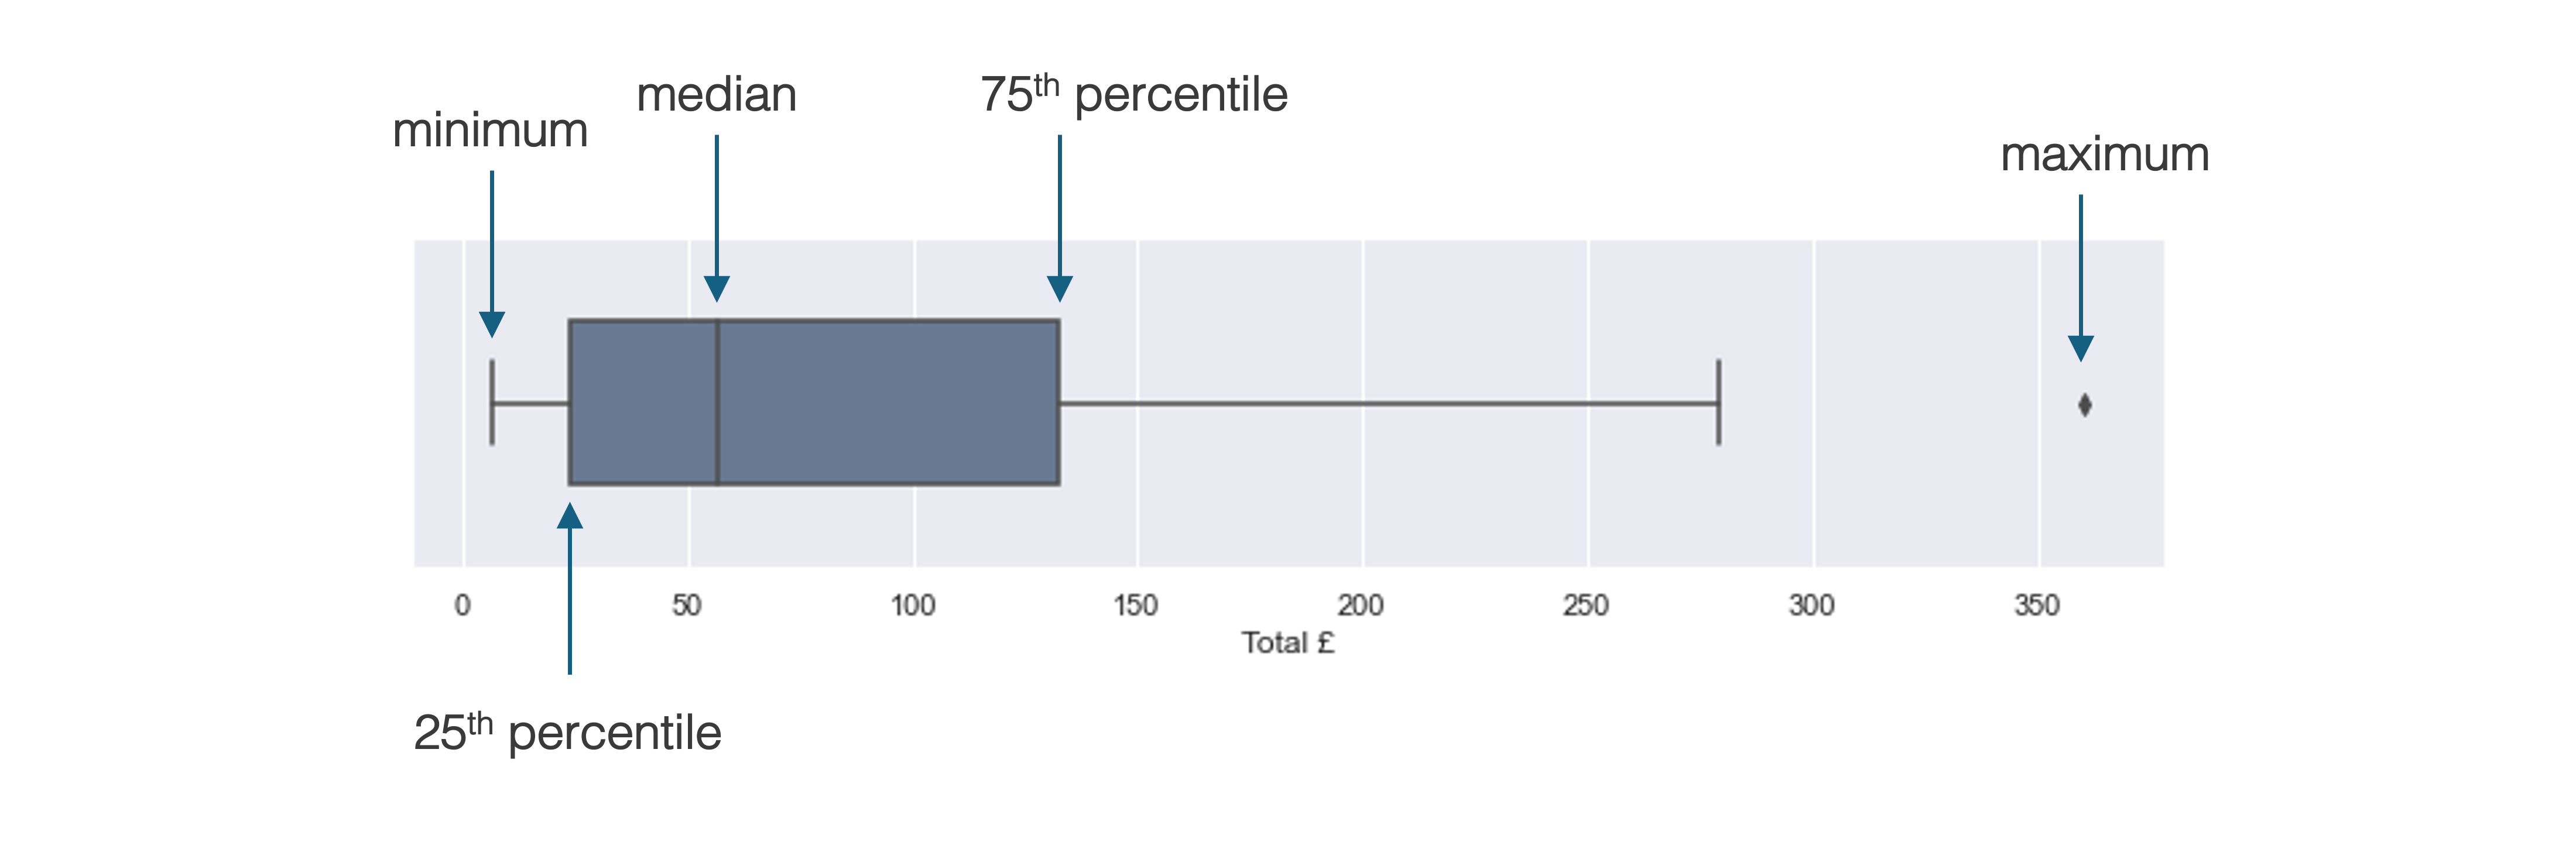

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> In this example, asymmetry in the data is evident when the median is not centered within the box. The length of the whiskers indicates the spread of the data, and outliers are displayed as dots beyond the whiskers. For instance, the maximum value appears as an outlier in this case because it lies beyond the upper whisker. </p>

<AxesSubplot: xlabel='Total £'>

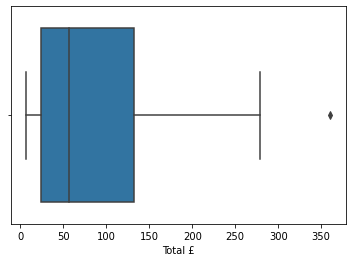

In [13]:
sns.boxplot(data=expenses, x='Total £')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> This command creates a single box plot representing the distribution of <code>Total £</code> for the entire dataset. It provides an overview of how expenses are distributed, highlighting the central tendency (median), the spread of values (IQR and whiskers), and any potential outliers in the total expenses data. </p>

<AxesSubplot: xlabel='Travel Type', ylabel='Total £'>

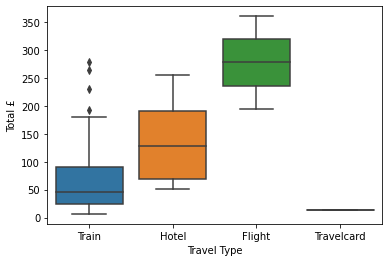

In [14]:
sns.boxplot(data=expenses, x='Travel Type', y='Total £')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> In contrast, the code above produces multiple box plots, one for each <code>Travel Type</code> category. Each box plot represents the distribution of <code>Total £</code> within that particular travel type. This allows us to compare how different travel types vary in terms of central tendency, variability, and the presence of outliers. For example, we might observe that some travel types have higher median expenses or more extreme outliers than others. </p>

<h2 style="font-size:1.4em; font-family:Verdana">Aggregating Across Multiple Columns with Different Functions</h2> 
<hr style="border: 0.5px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> In Pandas, you can perform different aggregation functions across multiple columns by using a dictionary to specify the functions to apply to each column. This allows for more complex aggregations where each column can be summarized using different statistics. For example, in the code below, we apply multiple aggregation functions to the <code>'Total £'</code> column and a single aggregation function to <code>'Travel Type'</code> and <code>'Reason for Travel'</code>. </p>

In [15]:
agg_dict = {'Total £': ['count', 'sum', 'mean'], 
            'Travel Type': 'max', 
            'Reason for Travel': 'max'}

expenses_agg = expenses.groupby('Traveller Name').aggregate(agg_dict)
expenses_agg

Total £                      Travel Type  \
                          count      sum        mean         max   
Traveller Name                                                     
Abigail Marshall Katung       2   100.10   50.050000       Train   
Andrew Scopes                 3   159.80   53.266667       Train   
Barry Anderson                1   255.00  255.000000       Hotel   
Debra Coupar                 10  1162.32  116.232000       Train   
Denise Ragan                  1   192.00  192.000000       Train   
Eileen Taylor                 2    75.50   37.750000       Train   
Fiona Venner                 16   879.60   54.975000  Travelcard   
Graham Latty                  2   188.00   94.000000       Train   
James Lewis                   5   485.95   97.190000       Train   
Jane Dowson                   1    33.00   33.000000       Train   
Jonathan David Pryor          6   544.25   90.708333       Train   
Judith Blake                 44  3792.66   86.196818       Train   
Lisa Mulherin                 4   278.10   69.525000       Train   
Mohammed Rafique              2   130.50   65.250000       Train   
Neil Walshaw                  5   278.45   55.690000  Travelcard   
Patricia Latty                1    84.00   84.000000       Train   
Peter Carlill                 1    24.10   24.100000       Train   
Rebecca Charlwood             3    68.85   22.950000       Train   
Stewart Golton                2   324.00  162.000000       Train   

                                                         Reason for Travel  
                                                                       max  
Traveller Name                                                              
Abigail Marshall Katung                        Conference - as an attendee  
Andrew Scopes               Meeting with other public sector organisations  
Barry Anderson                                 Conference - as an attendee  
Debra Coupar             Member portfolio/Council business (Elected Mem...  
Denise Ragan                                   Conference - as an attendee  
Eileen Taylor                                LCC hosted event - LCC funded  
Fiona Venner             Member portfolio/Council business (Elected Mem...  
Graham Latty                            Meeting with other external bodies  
James Lewis              Member portfolio/Council business (Elected Mem...  
Jane Dowson              Member portfolio/Council business (Elected Mem...  
Jonathan David Pryor     Member portfolio/Council business (Elected Mem...  
Judith Blake             Member portfolio/Council business (Elected Mem...  
Lisa Mulherin            Member portfolio/Council business (Elected Mem...  
Mohammed Rafique         Member portfolio/Council business (Elected Mem...  
Neil Walshaw             Member portfolio/Council business (Elected Mem...  
Patricia Latty                          Meeting with other external bodies  
Peter Carlill                                  Conference - as an attendee  
Rebecca Charlwood        Member portfolio/Council business (Elected Mem...  
Stewart Golton           Member portfolio/Council business (Elected Mem...

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> Here, we are specifying different aggregation functions for the <code>'Total £'</code> column: <code>'count'</code> (to count the number of entries), <code>'sum'</code> (to calculate the total expenses), and <code>'mean'</code> (to compute the average expense). For the columns <code>'Travel Type'</code> and <code>'Reason for Travel'</code>, we use the <code>'max'</code> function to select the most frequent or "maximum" value. 

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> After performing the aggregation, you’ll notice that the column names in the resulting DataFrame might not be as intuitive or readable. For instance, Pandas will automatically generate multi-level column names (tuples) to reflect the different aggregation functions applied. These names might look something like: </p>

In [16]:
expenses_agg.columns

MultiIndex([(          'Total £', 'count'),
            (          'Total £',   'sum'),
            (          'Total £',  'mean'),
            (      'Travel Type',   'max'),
            ('Reason for Travel',   'max')],
           )

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> As seen above, the column names become tuples (similar to a list used to store multiple items), which can make it difficult to work with and understand the DataFrame. To simplify this, we can change the multi-level column names into more readable names by renaming them. This can be done as follows: </p>

In [17]:
expenses_agg.columns = ['Count', 'Total', 'Average', 'Common Travel Type', 'Reason for Travel']
expenses_agg

,Count,Total,Average,Common Travel Type,Reason for Travel
Traveller Name,,,,,
Abigail Marshall Katung,2,100.10,50.050000,Train,Conference - as an attendee
Andrew Scopes,3,159.80,53.266667,Train,Meeting with other public sector organisations
Barry Anderson,1,255.00,255.000000,Hotel,Conference - as an attendee
Debra Coupar,10,1162.32,116.232000,Train,Member portfolio/Council business (Elected Mem...
Denise Ragan,1,192.00,192.000000,Train,Conference - as an attendee
Eileen Taylor,2,75.50,37.750000,Train,LCC hosted event - LCC funded
Fiona Venner,16,879.60,54.975000,Travelcard,Member portfolio/Council business (Elected Mem...
Graham Latty,2,188.00,94.000000,Train,Meeting with other external bodies
James Lewis,5,485.95,97.190000,Train,Member portfolio/Council business (Elected Mem...


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> Now, the <code>expenses_agg</code> DataFrame will have clear and concise column names, making it easier to analyze the aggregated data. The columns <code>'Count'</code>, <code>'Total'</code>, and <code>'Average'</code> correspond to the aggregation performed on <code>'Total £'</code>, while <code>'Common Travel Type'</code> and <code>'Reason for Travel'</code> reflect the most frequent value for those columns. </p> 
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> By using an aggregation dictionary, we can apply different aggregation functions across multiple columns, making it a powerful tool for summarizing complex datasets. Additionally, renaming columns post-aggregation ensures that the resulting DataFrame is easier to interpret and work with. This technique is especially useful when dealing with large datasets and when generating reports where clarity is crucial. </p>

<h2 style="font-size:1.4em; font-family:Verdana">Aggregating Data from 2018-19</h2> 

<hr style="border: 0.5px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> Now that we’ve performed the aggregation for the 2019-20 travel expenses, we’re going to shift our focus to the data from the previous year. Before we dive into learning about how to merge data from different time periods, let’s pull the expenses from 2018-19 and apply the same aggregation functions that we used for the 2019-20 data. This will allow us to maintain consistency when comparing the two datasets. </p>

In [18]:
expenses_18 = pd.read_csv('2018-19.csv')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> We will use the same <code>agg_dict</code> to aggregate the 2018-19 travel expenses by <code>'Traveller Name'</code>, summarizing the count, total, and average expenses as well as the most frequent travel type and reason for travel. </p>

In [19]:
agg_dict = {'Total £': ['count','sum', 'mean'], 'Travel Type': 'max', 'Reason for Travel': 'max'}

expenses_18_agg = expenses_18.groupby('Traveller Name').aggregate(agg_dict)
expenses_18_agg.columns = ['Count', 'Total', 'Average', 'Common Travel Type',  'Reason for Travel']
expenses_18_agg.head()

,Count,Total,Average,Common Travel Type,Reason for Travel
Traveller Name,,,,,
Alice Smart,4,261.09,65.2725,Train,Member portfolio/Council business (Elected Mem...
Alison Garthwaite,2,24.50,12.2500,Train,Conference - as an attendee
Andrew Carter,2,84.00,42.0000,Train,Meeting with other external bodies
Caroline Gruen,2,16.00,8.0000,Train,Conference - as an attendee
David Blackburn,2,134.98,67.4900,Hotel,Meeting with other public sector organisations


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> Here, we are performing the same operations on the 2018-19 data. We group the data by <code>'Traveller Name'</code> and apply our aggregation dictionary. After the aggregation, we rename the columns to match the same format as in the 2019-20 data, ensuring that both datasets are structured similarly for easy comparison. </p> 

<h2 style="font-size:1.4em; font-family:Verdana">Merging Data</h2>

<hr style="border: 0.5px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> Now that we have performed the aggregation on both the 2019-20 and 2018-19 expenses datasets, the next step is to merge these two datasets so that we can compare the data for the two years side by side. We will use the Pandas <code>merge()</code> function to combine the two DataFrames: <code>expenses_agg</code> (which contains the 2019-20 aggregated data) and <code>expenses_18_agg</code> (which contains the 2018-19 aggregated data).</p>

In [20]:
merged_data = pd.merge(left = expenses_agg, 
         right = expenses_18_agg, 
         how = 'outer',
         on="Traveller Name",
        suffixes=['_2019', '_2018'])

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> Let’s break down the components of the merge operation: </p> <ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> <li><strong>left = expenses_agg</strong>: This specifies the left DataFrame in the merge, which contains the 2019-20 aggregated data.</li> <li><strong>right = expenses_18_agg</strong>: This specifies the right DataFrame in the merge, which contains the 2018-19 aggregated data.</li> <li><strong>how = 'outer'</strong>: The <code>'outer'</code> join ensures that all rows from both DataFrames are included in the merged result, even if a traveller appears in only one of the two datasets. If a traveller is missing from either year, the corresponding values will be filled with <code>NaN</code>.</li> <li><strong>on = "Traveller Name"</strong>: This indicates that the merge should be performed based on the <code>'Traveller Name'</code> column, meaning the data will be aligned by each traveller across both datasets.</li> <li><strong>suffixes=['_2019', '_2018']</strong>: Since both DataFrames have similar columns (e.g., <code>'Total'</code>, <code>'Average'</code>), we use <code>suffixes</code> to distinguish between the columns for each year. The suffix <code>'_2019'</code> will be added to the column names from the 2019-20 dataset, while <code>'_2018'</code> will be added to the column names from the 2018-19 dataset.</li> </ul> <p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> As a result, the <code>merged_data</code> DataFrame will have a combination of the data from both years. For example, you will have columns such as <code>'Total_2019'</code> and <code>'Total_2018'</code>, which show the total expenses for each traveller in the respective years. If a traveller only has data for one year, the other year’s columns will contain <code>NaN</code> values. </p> 

In [21]:
merged_data.head()

,Count_2019,Total_2019,Average_2019,Common Travel Type_2019,Reason for Travel_2019,Count_2018,Total_2018,Average_2018,Common Travel Type_2018,Reason for Travel_2018
Traveller Name,,,,,,,,,,
Abigail Marshall Katung,2.0,100.10,50.050000,Train,Conference - as an attendee,NaN,NaN,NaN,NaN,NaN
Andrew Scopes,3.0,159.80,53.266667,Train,Meeting with other public sector organisations,NaN,NaN,NaN,NaN,NaN
Barry Anderson,1.0,255.00,255.000000,Hotel,Conference - as an attendee,NaN,NaN,NaN,NaN,NaN
Debra Coupar,10.0,1162.32,116.232000,Train,Member portfolio/Council business (Elected Mem...,11.0,1525.7,138.70,Train,Member portfolio/Council business (Elected Mem...
Denise Ragan,1.0,192.00,192.000000,Train,Conference - as an attendee,2.0,24.5,12.25,Train,Conference - as an attendee


In [22]:
merged_data.tail()

,Count_2019,Total_2019,Average_2019,Common Travel Type_2019,Reason for Travel_2019,Count_2018,Total_2018,Average_2018,Common Travel Type_2018,Reason for Travel_2018
Traveller Name,,,,,,,,,,
Pat Latty,NaN,NaN,NaN,NaN,NaN,2.0,124.5,62.25,Train,Meeting with other external bodies
Pauleen Grahame,NaN,NaN,NaN,NaN,NaN,2.0,221.0,110.50,Train,Conference - as an attendee
Pauline Grahame,NaN,NaN,NaN,NaN,NaN,1.0,269.0,269.00,Train,Conference - as an attendee
Richard Lewis,NaN,NaN,NaN,NaN,NaN,2.0,61.0,30.50,Train,Member portfolio/Council business (Elected Mem...
Sharon Hamilton,NaN,NaN,NaN,NaN,NaN,2.0,24.5,12.25,Train,Conference - as an attendee


<h2 style="font-size:1.4em; font-family:Verdana">Why Use an Outer Join?</h2> <p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> The reason we chose the <code>'outer'</code> join is to ensure that no data is lost. If we had used an <code>'inner'</code> join, only the travellers who appear in both datasets would be included in the result. By using an outer join, we ensure that all travellers from both datasets are included, even if they are missing from one of the years. This is important for thorough analysis, especially when tracking travel trends over time. </p> 

In [23]:
merged_data_inner = pd.merge(left = expenses_agg, 
         right = expenses_18_agg, 
         how = 'inner',
         on="Traveller Name",
        suffixes=['_2019', '_2018'])
merged_data_inner.head()

,Count_2019,Total_2019,Average_2019,Common Travel Type_2019,Reason for Travel_2019,Count_2018,Total_2018,Average_2018,Common Travel Type_2018,Reason for Travel_2018
Traveller Name,,,,,,,,,,
Debra Coupar,10,1162.32,116.232,Train,Member portfolio/Council business (Elected Mem...,11,1525.7,138.700000,Train,Member portfolio/Council business (Elected Mem...
Denise Ragan,1,192.00,192.000,Train,Conference - as an attendee,2,24.5,12.250000,Train,Conference - as an attendee
Graham Latty,2,188.00,94.000,Train,Meeting with other external bodies,2,124.5,62.250000,Train,Meeting with other external bodies
James Lewis,5,485.95,97.190,Train,Member portfolio/Council business (Elected Mem...,14,1101.8,78.700000,Train,Member portfolio/Council business (Elected Mem...
Jane Dowson,1,33.00,33.000,Train,Member portfolio/Council business (Elected Mem...,3,295.1,98.366667,Train,Member portfolio/Council business (Elected Mem...


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em"> You might be wondering if it's possible to export the merged data out of Pandas. The answer is yes! We can easily do this using the <code>to_csv()</code> function, which allows us to save the any DataFrame as a CSV file. </p>

In [24]:
merged_data.to_csv('merged_data.csv')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    After exporting it as a CSV file, we can then explore the data in Excel or Power BI.
</p>


<h2 style="font-size:1.4em; font-family:Verdana">Final Thoughts</h2>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In today's tutorial, we covered quite a lot. We looked at the fundamentals of <code>groupby</code>, explored the different kinds of aggregations we can perform in Python, and saw how aggregation and visualization go hand in hand. We then explored some plotting functions in Seaborn, and finally, we learned how to merge data and export it as a CSV file.
</p>
